In [1]:
import os
import math
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import save
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Předzpracování dat

## Nahrání dat

### Záznamy z kosu

In [2]:
data_file = 'data_apr_1'

In [3]:
path_file = os.sep.join([data_file, 'prihlaska_dim.csv'])
prihlaska_dim = pd.read_csv(path_file, sep=";") 

path_file = os.sep.join([data_file, 'klasifikace_fact.csv'])
klasifikace_fact = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'predmet_dim.csv'])
predmet_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'zaverecne_prace_fact.csv'])
prace_fact = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'szzk_dim.csv'])
szzk_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'student_dim.csv'])
student_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'studium_dim.csv'])
studium_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'semestr_dim.csv'])
semestr_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data_file, 'zaverecne_prace_dilci_hodnoceni_dim.csv'])
hodnoceni_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed = pd.read_csv(path_file, sep=",")

### Předměty

In [4]:
# bakalar vsechny povinne spolecne predmety
path_file = os.sep.join(['predmety', 'courses_baks.csv'])
courses_baks = pd.read_csv(path_file, sep=",")

# magistr vsechny povinne spolecne predmety
path_file = os.sep.join(['predmety', 'courses_mag.csv'])
courses_mag = pd.read_csv(path_file, sep=",")

# bakalar vsechny specializace
path_file = os.sep.join(['predmety', 'courses_bak_spec.csv'])
courses_bak_spec = pd.read_csv(path_file, sep=",")

# magistr vsechny specializace
path_file = os.sep.join(['predmety', 'courses_mag_spec.csv'])
courses_mag_spec = pd.read_csv(path_file, sep=",")

# bakalar
path_file = os.sep.join(['predmety', 'zi_1517_bak.csv'])
zi_1517_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_wi_bak.csv'])
wsi_wi_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_si_bak.csv'])
wsi_si_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_pg_bak.csv'])
wsi_pg_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'bit_bak.csv'])
bit_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'zi_1820_bak.csv'])
zi_1820_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'ti_bak.csv'])
ti_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'ism_bak.csv'])
ism_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pi_bak.csv'])
pi_bak = pd.read_csv(path_file, sep=",")

# magistr
path_file = os.sep.join(['predmety', 'zi_1617_mag.csv'])
zi_1617_mag = pd.read_csv(path_file, sep=",") 

path_file = os.sep.join(['predmety', 'sp_1619_mag.csv'])
sp_1619_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_si_mag.csv'])
wsi_si_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'zi_1819_mag.csv'])
zi_1819_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'npvs_mag.csv'])
npvs_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'sp_1617_mag.csv'])
sp_1617_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pss_mag.csv'])
pss_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'pb_mag.csv'])
pb_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_ism_mag.csv'])
wsi_ism_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['predmety', 'wsi_wi_mag.csv'])
wsi_wi_mag = pd.read_csv(path_file, sep=",")

### IZO

In [5]:
path_file = os.sep.join(['skolaIZO', 'izos.pkl'])
with open(path_file, 'rb') as file:
    izos = pickle.load(file)

path_file = os.sep.join(['skolaIZO', 'red_izos.pkl'])
with open(path_file, 'rb') as file:
    red_izos = pickle.load(file)

## Odstranění duplikátů

In [6]:
ids_bak = prihlaska_dim.studium_id
prihlaska_dim[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,cislo_prihlasky,odkud_uchazec_prihlasen_kod,prihlaska_kod,studium_id,rozhodnuti_kod,obor_ss_kod,ss_izo,ss_typ,ss_predmet1,ss_predmet2,ss_predmet3,ss_predmet4,ss_predmet5,ss_predmet1_znamky,ss_predmet2_znamky,ss_predmet3_znamky,ss_predmet4_znamky,ss_predmet5_znamky,ss_predmet1_prumer,ss_predmet2_prumer,ss_predmet3_prumer,ss_predmet4_prumer,ss_predmet5_prumer,ss_prumer_prumeru,ss_prumer_znamek,bakalar_prumer,predchozi_studium,doplnujici_udaj1,doplnujici_udaj2,doplnujici_udaj3,doplnujici_udaj4,typ_prihlasky,maturita_znamky,maturita_prumer,maturita_predmety,maturita_rok,cislo_mistnosti_pz,datum_pz,prominuti_pz,hodnoceni_pz,hodnoceni_pz_cast1,hodnoceni_pz_cast2,hodnoceni_pz_cast3,hodnoceni_pz_cast4,hodnoceni_pz_cast5,hodnoceni_pz_cast6,hodnoceni_pz_cast7,hodnoceni_pz_cast8,hodnoceni_pz_cast9,hodnoceni_pz_cast10,hodnoceni_pz_cast11,hodnoceni_pz_cast12,zapsal_ke_studiu,status,stipendium,stipendium_cizi,kolej_zadost,termin,prechodne,studijni_skupina,nove_prijaty,navazujici_stud_program,trvaly_pobyt_v_cr,financovani,stupen_predchoziho_vzdelani,pz1_datum,pz1_cas,pz1_mistnost,pz2_datum,pz2_cas,pz2_mistnost,pz3_datum,pz3_cas,pz3_mistnost,pisemny_test,anketa_odkud_kod,anketa_odkud_poznamka,cislo_uchazece,scio_test,olympiady,postizeni_kod,postizeni_poznamka,placeno_r,placeno_poznamka,placeno_mail,staz_stat,staz_poznamka,maturita_uroven,zajem,zprava_pro_uchazece,priorita,datum_registrace,datum_rozhodnuti,misto_kod,okres_kod,zeme_kod,psc


In [7]:
ids_bak = student_dim.studium_id
student_dim[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,typ_adresy,kod_obce,kod_okresu,kod_zeme,psc
584,8373106,1731506,M,1987-09-01,Volgograd,Rusko,Rusko,T,554782.0,3100.0,203,16900
585,8373106,1731506,M,1987-09-01,Volgograd,Rusko,Rusko,T,NaN,7777.0,643,NaN
3638,6269406,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
3639,6269406,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
3640,13109806,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
3641,13109806,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
3642,12033706,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
3643,12033706,4784406,M,1993-07-21,Praha,Česko,Česko,T,539414.0,3210.0,203,25266
14300,18944606,18814106,M,1996-10-05,Praha,Česko,Česko,T,538728.0,3209.0,203,25101
14301,18944606,18814106,M,1996-10-05,Praha,Česko,Česko,T,538728.0,3209.0,203,25101


In [8]:
# odstraneni duplikatu
student_dim.drop_duplicates(subset=['studium_id'], inplace=True)

In [9]:
ids_bak = student_dim.studium_id
student_dim[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,typ_adresy,kod_obce,kod_okresu,kod_zeme,psc


In [10]:
ids_bak = studium_dim.studium_id
studium_dim[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,zamereni_id,fakulta_id,nazev_fakulty,jazyk_vyuky,ukonceni_zpusob,platby_stav,pruchod,rok_maturity,odkud_skola_kod


## Odstranění zbytečných sloupců

In [11]:
prace_fact_o = prace_fact.copy(deep=True)
prace_fact = prace_fact.drop(columns=['nazev_cs', 'nazev_en'])

student_dim_o = student_dim.copy(deep=True)
student_dim = student_dim.drop(columns=['typ_adresy'])

studium_dim_o = studium_dim.copy(deep=True)
studium_dim = studium_dim.drop(columns=['zamereni_id', 
                                        'nazev_fakulty', 
                                        'fakulta_id', 
                                        'platby_stav', 
                                        'pruchod'])

hodnoceni_dim_o = hodnoceni_dim.copy(deep=True)
hodnoceni_dim = hodnoceni_dim.drop(columns=['predmet_cislo'])

## Jednotlivé datasety

### Studenti

#### studium_dim

In [12]:
studium_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16578 entries, 0 to 16577
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studium_id       16578 non-null  int64  
 1   typ_programu     16578 non-null  object 
 2   forma_studia     13883 non-null  object 
 3   datum_zahajeni   16578 non-null  object 
 4   datum_ukonceni   14342 non-null  object 
 5   rocnik           16565 non-null  float64
 6   studijni_stav    16578 non-null  object 
 7   studuje          16578 non-null  object 
 8   jazyk_vyuky      16029 non-null  object 
 9   ukonceni_zpusob  14342 non-null  float64
 10  rok_maturity     11869 non-null  object 
 11  odkud_skola_kod  10963 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.5+ MB


In [13]:
# prevedeni odkud_skola_kod na int
studium_dim.odkud_skola_kod = studium_dim.odkud_skola_kod.fillna(0)
studium_dim.odkud_skola_kod = studium_dim.odkud_skola_kod.astype(int)

In [14]:
# zmena datum_zahajeni pouze na rok a zmena ze stringu na int
studium_dim['datum_zahajeni'] = studium_dim['datum_zahajeni'].apply(lambda x: x.split('-')[0])

studium_dim['datum_ukonceni'] = studium_dim['datum_ukonceni'].fillna('0')
studium_dim['datum_ukonceni'] = studium_dim['datum_ukonceni'].apply(lambda x: x.split('-')[0])

studium_dim['rok_maturity'] = studium_dim['rok_maturity'].fillna('0')
studium_dim['rok_maturity'] = studium_dim['rok_maturity'].apply(lambda x: x.split('-')[0])

studium_dim['datum_zahajeni'] = pd.to_numeric(studium_dim['datum_zahajeni'])
studium_dim['datum_ukonceni'] = pd.to_numeric(studium_dim['datum_ukonceni'])
studium_dim['rok_maturity'] = pd.to_numeric(studium_dim['rok_maturity'])

In [15]:
# novy dataset, ktery propojuje studium_dim a student_dim
student_studium_dim = student_dim.merge(studium_dim, on='studium_id', how='inner')
student_studium_dim[student_studium_dim.studium_id==6269406]
#student_dim[student_dim.studium_id==6269406]

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,kod_obce,kod_okresu,kod_zeme,psc,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,jazyk_vyuky,ukonceni_zpusob,rok_maturity,odkud_skola_kod
3637,6269406,4784406,M,1993-07-21,Praha,Česko,Česko,539414.0,3210.0,203,25266,B,P,2012,2015,4.0,3,K,CS,2.0,2012,336475


In [16]:
# odstranění erasmus studentů, krátkodobé studijní pobyty, úmrtí
students_erasmus = student_studium_dim[(student_studium_dim.ukonceni_zpusob==60)].studium_id.unique()
students_short = student_studium_dim[(student_studium_dim.ukonceni_zpusob==20)].studium_id.unique()
students_dead = student_studium_dim[(student_studium_dim.ukonceni_zpusob==8)].studium_id.unique()

student_studium_dim = student_studium_dim[(~student_studium_dim.studium_id.isin(students_erasmus))
                         & (~student_studium_dim.studium_id.isin(students_short))
                         & (~student_studium_dim.studium_id.isin(students_dead))]

In [17]:
# kontrola, jestli existuje ve studium_dim vice zaznamu se stejnym studium_id
ids = student_studium_dim['studium_id']
student_studium_dim[ids.isin(ids[ids.duplicated()])]

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,kod_obce,kod_okresu,kod_zeme,psc,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,jazyk_vyuky,ukonceni_zpusob,rok_maturity,odkud_skola_kod


In [18]:
# ponechat je student_studium_dim pouze studenty v CJ a prezencni forme
student_studium_dim = student_studium_dim[(student_studium_dim['jazyk_vyuky'] == 'CS')
                             & (student_studium_dim['forma_studia'] == 'P')]

In [19]:
# jen studenti, kteri nastoupili od roku 2015 resp. 2016
# bakalar
student_studium_dim_bak_2015 = student_studium_dim[(student_studium_dim['datum_zahajeni'] >= 2015)
                             & (student_studium_dim['typ_programu'] == 'B')]
# magistr
student_studium_dim_mag_2016 = student_studium_dim[(student_studium_dim['datum_zahajeni'] >= 2016)
                             & (student_studium_dim['typ_programu'] == 'N')]

# studenti rozdeleni na bakalarske a magisterske
# bakalar
student_studium_dim_bak = student_studium_dim[(student_studium_dim['typ_programu'] == 'B')]
# magistr
student_studium_dim_mag = student_studium_dim[(student_studium_dim['typ_programu'] == 'N')]

In [20]:
# id techto studentu 
student_studium_id_bak_2015 = student_studium_dim_bak_2015['studium_id'].unique()
student_studium_id_mag_2016 = student_studium_dim_mag_2016['studium_id'].unique()

student_studium_id_bak = student_studium_dim_bak['studium_id'].unique()
student_studium_id_mag = student_studium_dim_mag['studium_id'].unique()

In [21]:
path_file = os.sep.join(['created_data', 'student_studium_dim.csv'])
student_studium_dim.to_csv(path_file, index=False)

##### Přidání informace o střední škole

In [22]:
student_studium_dim['gymnazium'] = 0
student_studium_dim.loc[(student_studium_dim.odkud_skola_kod.isin(izos)) |
            (student_studium_dim.odkud_skola_kod.isin(red_izos)), 'gymnazium'] = 1
student_studium_dim.loc[(student_studium_dim.odkud_skola_kod == 0), 'gymnazium'] = 2

#### Student_dim

##### Přidání informace o tom, jestli jsou z Prahy

In [23]:
student_studium_dim['praha'] = 0
student_studium_dim.loc[(student_studium_dim.kod_obce == 554782) |
            (student_studium_dim.kod_okresu == 3100), 'praha'] = 1
student_studium_dim.loc[(student_studium_dim.kod_obce.isna()) |
            (student_studium_dim.kod_okresu.isna()), 'praha'] = 2

In [24]:
student_studium_dim.praha.value_counts()

0    6801
1    3179
2    2116
Name: praha, dtype: int64

### prihlaska_dim

In [25]:
prihlaska_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cislo_prihlasky              5045 non-null   int64  
 1   odkud_uchazec_prihlasen_kod  2357 non-null   float64
 2   prihlaska_kod                5045 non-null   int64  
 3   studium_id                   5045 non-null   int64  
 4   rozhodnuti_kod               5040 non-null   float64
 5   obor_ss_kod                  1302 non-null   object 
 6   ss_izo                       1826 non-null   float64
 7   ss_typ                       1813 non-null   float64
 8   ss_predmet1                  65 non-null     object 
 9   ss_predmet2                  61 non-null     object 
 10  ss_predmet3                  1 non-null      object 
 11  ss_predmet4                  1 non-null      object 
 12  ss_predmet5                  0 non-null      float64
 13  ss_predmet1_znamky

##### Přidání informace o tom, jak byli přijati

In [26]:
stud_olym = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 11)
                           | (prihlaska_dim.hodnoceni_pz_cast6.notna())
                           | (prihlaska_dim.olympiady.notna())].studium_id.unique()

In [27]:
len(stud_olym)

1772

In [28]:
stud_scio = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 13)
                           | (prihlaska_dim.hodnoceni_pz_cast7.notna())
                           | (prihlaska_dim.scio_test.notna())].studium_id.unique()

In [29]:
len(stud_scio)

3856

In [30]:
stud_zk = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 10)
                           | (prihlaska_dim.hodnoceni_pz_cast2.notna())].studium_id.unique()

In [31]:
len(stud_zk)

838

In [32]:
stud_prominuti = prihlaska_dim[(prihlaska_dim.rozhodnuti_kod == 10)
                           | (prihlaska_dim.hodnoceni_pz_cast1.notna())].studium_id.unique()

In [33]:
len(stud_prominuti)

772

In [34]:
student_studium_dim['olym'] = 0
student_studium_dim['scio'] = 0
student_studium_dim['zkouska'] = 0
student_studium_dim['prominuti'] = 0
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_olym)), 'olym'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_scio)), 'scio'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_zk)), 'zkouska'] = 1
student_studium_dim.loc[(student_studium_dim.studium_id.isin(stud_prominuti)), 'prominuti'] = 1

In [35]:
student_studium_dim

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,kod_obce,kod_okresu,kod_zeme,psc,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,jazyk_vyuky,ukonceni_zpusob,rok_maturity,odkud_skola_kod,gymnazium,praha,olym,scio,zkouska,prominuti
0,1578106,1056306,M,1990-05-18,Kajrakkum,Tádžikistán,Tádžikistán,NaN,NaN,762,735752,B,P,2009,2013,4.0,17,K,CS,1.0,2007,999999999,0,2,0,0,0,0
2,1584806,1136106,M,1987-03-10,"Štúrovo, Slovenská Republika",Slovensko,NaN,NaN,NaN,703,NaN,B,P,2009,2009,1.0,3,K,CS,2.0,2006,999999999,0,2,0,0,0,0
6,19374606,1304906,M,1989-07-19,Praha,Česko,Česko,539627.0,3210.0,203,25263,B,P,2021,2021,1.0,3,K,CS,2.0,2009,61388246,1,0,1,0,0,0
7,4783406,1307506,M,1990-03-26,Chrudim,Česko,NaN,572268.0,3603.0,203,53821,B,P,2011,2012,1.0,3,K,CS,2.0,2009,60103329,1,0,0,0,0,0
8,8396706,1313706,Z,1990-03-07,Praha 4,Česko,Česko,539902.0,3210.0,203,25245,B,P,2013,2013,1.0,3,K,CS,2.0,2009,638358,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,3727706,366154000,M,1989-06-27,Pardubice,Česko,Česko,554782.0,3100.0,203,15521,B,P,2010,2013,3.0,17,K,CS,1.0,2009,61388866,0,1,0,0,0,0
16500,8325206,366154000,M,1989-06-27,Pardubice,Česko,Česko,554782.0,3100.0,203,15521,N,P,2013,2015,2.0,16,K,CS,1.0,0,0,2,1,0,0,0,0
16505,5411606,7109303036,M,1971-09-30,Hradec Králové,Česko,NaN,569810.0,3602.0,203,50002,N,P,2011,2012,2.0,3,K,CS,2.0,0,0,2,0,0,0,0,0
16531,2816306,8001082925,M,1980-01-08,Ústí nad Labem,Česko,NaN,554804.0,3510.0,203,40003,B,P,2009,2010,2.0,7,K,CS,3.0,1999,673218,0,0,0,0,0,0


##### Doplnění stud_praha pomocí informací z prihlaska_dim

In [36]:
studs_nan_kod = student_studium_dim[(student_studium_dim.kod_obce.isna()) | (student_studium_dim.kod_okresu.isna())]['studium_id'].unique()

In [37]:
prihlaska_dim[(prihlaska_dim.misto_kod.notna())
                &(prihlaska_dim.misto_kod.str.contains('Praha', case=False))]['misto_kod'].unique()

array(['Praha', 'Praha 10', 'Praha 8', 'Praha 8 - Kobylisy', 'Praha 3',
       'Praha 4', 'Praha - Libeň (Praha 8)', 'Praha 4 - Michle',
       'Praha 7', 'Praha 6', 'Praha 2', 'Praha 5', 'Praha 13',
       'Praha 5 - Košíře',
       'Praha                                                                                                                                                                                                   ',
       'Praha 3 - Žižkov'], dtype=object)

In [38]:
studs_notna_kod_pri = prihlaska_dim[((prihlaska_dim.okres_kod.notna()) | (prihlaska_dim.misto_kod.notna()))
                       & (prihlaska_dim.studium_id.isin(studs_nan_kod)) 
                       & (((prihlaska_dim.misto_kod.notna())
                          &(prihlaska_dim.misto_kod.str.contains('Praha', case=False)))
                             | (prihlaska_dim.okres_kod == 3100)
                                  )].studium_id.unique()

In [39]:
student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_notna_kod_pri)), 'praha'] = 1

In [40]:
student_studium_dim.praha.value_counts()

0    6801
1    3181
2    2114
Name: praha, dtype: int64

##### Doplnění stud_gym pomocí informací z prihlaska_dim

In [41]:
studs_nan_kod = student_studium_dim[(student_studium_dim.odkud_skola_kod == 0)]['studium_id'].unique()

In [42]:
len(studs_nan_kod)

2797

In [43]:
len(student_studium_dim)

12096

In [44]:
student_studium_dim.gymnazium.value_counts()

1    4863
0    4436
2    2797
Name: gymnazium, dtype: int64

In [45]:
studs_gym_pri = prihlaska_dim[(prihlaska_dim.ss_typ == 2)
                       | (prihlaska_dim.obor_ss_kod.str.contains('K', case=False))
                        | (prihlaska_dim.stupen_predchoziho_vzdelani == 'K')].studium_id.unique()

In [46]:
student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_gym_pri)), 'gymnazium'] = 1

In [47]:
student_studium_dim.gymnazium.value_counts()

1    5209
0    4149
2    2738
Name: gymnazium, dtype: int64

In [48]:
studs_not_gym_pri = prihlaska_dim[((prihlaska_dim.obor_ss_kod.notna())
                                        & (prihlaska_dim.obor_ss_kod.str.contains('K', case=False) == False))
                                  | ((prihlaska_dim.stupen_predchoziho_vzdelani != 'K')
                                        & (prihlaska_dim.stupen_predchoziho_vzdelani.notna()))].studium_id.unique()

In [49]:
student_studium_dim.loc[(student_studium_dim.studium_id.isin(studs_not_gym_pri)), 'gymnazium'] = 0

In [50]:
student_studium_dim.gymnazium.value_counts()

1    5111
0    4691
2    2294
Name: gymnazium, dtype: int64

### Předměty

#### Pomocné proměnné k předmětům

In [51]:
# id a kody relevantních předmětů (od roku 2015, resp. 2016, jen PP / PO)
courses_kod_bak_spec = courses_bak_spec["kod_predmetu"].unique()
courses_bak_spec = predmet_dim[(predmet_dim['kod_predmetu'].isin(courses_kod_bak_spec))].loc[:, ['kod_predmetu', 'predmet_id']]
courses_id_bak_spec = courses_bak_spec['predmet_id'].unique()

courses_kod_mag_spec = courses_mag_spec["kod_predmetu"].unique()
courses_mag_spec = predmet_dim[(predmet_dim['kod_predmetu'].isin(courses_kod_mag_spec))].loc[:, ['kod_predmetu', 'predmet_id']]
courses_id_mag_spec = courses_mag_spec['predmet_id'].unique()

In [52]:
#pomocne slovniky

#slovnik predmet_id: kod_predmetu
courses_tran_id_kod = dict()
for index, row in predmet_dim.iterrows():
    courses_tran_id_kod[row['predmet_id']] = row['kod_predmetu']
    
#slovnik kod_predmetu: predmet_id
courses_tran_kod_id = dict()
for index, row in predmet_dim.iterrows():
    courses_tran_kod_id[row['kod_predmetu']] = row['predmet_id']

In [53]:
path_file = os.sep.join(['created_data', 'courses_tran_id_kod.pkl'])
file = open(path_file, 'wb')
pickle.dump(courses_tran_id_kod, file)
file.close()

path_file = os.sep.join(['created_data', 'courses_tran_kod_id.pkl'])
file = open(path_file, 'wb')
pickle.dump(courses_tran_kod_id, file)
file.close()

In [54]:
#pomocna promenna array vsech pp bak pred
courses_baks = courses_baks[(courses_baks['kod_predmetu'] != 'BI-BAP')
                            & (courses_baks['kod_predmetu'] != 'BI-BPR')]
courses_kod_bak = courses_baks['kod_predmetu'].unique()

#pomocna promenna array vsech pp mag pred
courses_mag = courses_mag[(courses_mag['kod_predmetu'] != 'MI-MPR')
                            & (courses_mag['kod_predmetu'] != 'MI-DIP')]
courses_kod_mag = courses_mag['kod_predmetu'].unique()
    
courses_id_bak = []
for course in courses_kod_bak:
    courses_id_bak.append(courses_tran_kod_id[course])

courses_id_mag = []
for course in courses_kod_mag:
    courses_id_mag.append(courses_tran_kod_id[course])

In [55]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = ['BI-DPR']
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [56]:
# predmety podle doporuceneho semestru id
courses_1_id = []
for course in courses_1:
    courses_1_id.append(courses_tran_kod_id[course])
courses_2_id = []
for course in courses_2:
    courses_2_id.append(courses_tran_kod_id[course])
courses_3_id = []
for course in courses_3:
    courses_3_id.append(courses_tran_kod_id[course])
courses_4_id = []
for course in courses_4:
    courses_4_id.append(courses_tran_kod_id[course])
courses_5_id = []
for course in courses_5:
    courses_5_id.append(courses_tran_kod_id[course])
courses_6_id = []
for course in courses_6:
    courses_6_id.append(courses_tran_kod_id[course])
courses_7_id = []
for course in courses_7:
    courses_7_id.append(courses_tran_kod_id[course])

courses_id = courses_1_id + courses_2_id + courses_3_id + courses_4_id + courses_5_id + courses_6_id + courses_7_id

In [57]:
predmet_dim.pocet_kreditu = predmet_dim.pocet_kreditu.fillna(0)

In [58]:
def get_credits_semester(student, semester):
    student_courses = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == student)
                                     & (klasifikace_fact_changed.semestr_id == semester)
                                     & (klasifikace_fact_changed.znamka != 4)
                                     & (klasifikace_fact_changed.znamka.notna())].predmet_id.unique()
    credits_sum = 0
    all_courses = predmet_dim.predmet_id.unique()
    for course in student_courses: 
        if course in all_courses:
            credits_sum += predmet_dim[predmet_dim.predmet_id == course].iloc[0]['pocet_kreditu']
    return credits_sum

In [59]:
def get_credits(student):
    student_courses = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == student)
                                              & (klasifikace_fact_changed.znamka != 4)
                                              & (klasifikace_fact_changed.znamka.notna())].predmet_id.unique()
    credits_sum = 0
    all_courses = predmet_dim.predmet_id.unique()
    for course in student_courses: 
        if course in all_courses:
            credits_sum += predmet_dim[predmet_dim.predmet_id == course].iloc[0]['pocet_kreditu']
    return credits_sum

### Klasifikace

#### klasifikace_fact

In [60]:
klasifikace_fact_o = klasifikace_fact.copy(deep=True)

#### Propojení předmětů přes akreditace

In [61]:
# PA1
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-PA1'], 
      courses_tran_kod_id['BIE-PA1'], 
      courses_tran_kod_id['BI-PA1.21'], 
      courses_tran_kod_id['BIE-PA1.21'],
      courses_tran_kod_id['BIK-PA1.21']],
     
      courses_tran_kod_id['BI-PA1']
     )

#PAI
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-PAI'], 
      courses_tran_kod_id['BIE-PAI'], 
      courses_tran_kod_id['BI-PAI.21'], 
      courses_tran_kod_id['BIE-PAI.21'],
      courses_tran_kod_id['BIK-PAI.21']],
     
      courses_tran_kod_id['BI-PAI']
     )

#ZMA
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-ZMA'], 
      courses_tran_kod_id['BIE-ZMA']],
     
    courses_tran_kod_id['BI-ZMA']
     )
klasifikace_fact

#CAO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-CAO'], 
      courses_tran_kod_id['BIE-CAO'], 
      courses_tran_kod_id['BI-TZP.21'], 
      courses_tran_kod_id['BIE-TZP.21'],
      courses_tran_kod_id['BIK-TZP.21']],
     
      courses_tran_kod_id['BI-CAO']
     )

#CAO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BI-UOS'], 
      courses_tran_kod_id['BIE-UOS'], 
      courses_tran_kod_id['BIK-UOS'], 
      courses_tran_kod_id['BI-UOS.21'],
      courses_tran_kod_id['BIK-UOS.21'],
      courses_tran_kod_id['BIE-PS1'],
      courses_tran_kod_id['BIK-PS1'],
      courses_tran_kod_id['BIE-UOS.21']],
     
      courses_tran_kod_id['BI-PS1']
     )

#MLO
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIK-MLO'], 
      courses_tran_kod_id['BIE-MLO']],
     
      courses_tran_kod_id['BI-MLO']
     )

#PA2
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PA2'], 
      courses_tran_kod_id['BIK-PA2'], 
      courses_tran_kod_id['BI-PA2.21'], 
      courses_tran_kod_id['BIE-PA2.21'],
      courses_tran_kod_id['BIK-PA2.21']],
     
      courses_tran_kod_id['BI-PA2']
     )

#SAP
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-SAP'], 
      courses_tran_kod_id['BIK-SAP'], 
      courses_tran_kod_id['BI-SAP.21'], 
      courses_tran_kod_id['BIE-SAP.21'],
      courses_tran_kod_id['BIK-SAP.21']],
     
      courses_tran_kod_id['BI-SAP']
     )

#DBS
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-DBS'], 
      courses_tran_kod_id['BIK-DBS'], 
      courses_tran_kod_id['BI-DBS.21'], 
      courses_tran_kod_id['BIE-DBS.21'],
      courses_tran_kod_id['BIK-DBS.21']],
     
      courses_tran_kod_id['BI-DBS']
     )

#LIN
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['A0B01LAG'],
    courses_tran_kod_id['BIE-LIN'], 
      courses_tran_kod_id['BIK-LIN']],
     
      courses_tran_kod_id['BI-LIN']
     )

#AAG
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-AAG'], 
      courses_tran_kod_id['BIK-AAG'], 
      courses_tran_kod_id['BI-AAG.21'], 
      courses_tran_kod_id['BIE-AAG.21'],
      courses_tran_kod_id['BIK-AAG.21']],
     
      courses_tran_kod_id['BI-AAG']
     )

#ZDM
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-ZDM'], 
      courses_tran_kod_id['BIK-ZDM']],
     
      courses_tran_kod_id['BI-ZDM']
     )

#OSY
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-OSY'], 
      courses_tran_kod_id['BIK-OSY'], 
      courses_tran_kod_id['BI-OSY.21'], 
      courses_tran_kod_id['BIE-OSY.21'],
      courses_tran_kod_id['BIK-OSY.21']],
     
      courses_tran_kod_id['BI-OSY']
     )

#PSI
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PSI'], 
      courses_tran_kod_id['BIK-PSI'], 
      courses_tran_kod_id['BI-PSI.21'], 
      courses_tran_kod_id['BIE-PSI.21'],
      courses_tran_kod_id['BIK-PSI.21']],
     
      courses_tran_kod_id['BI-PSI']
     )

#BEZ
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['A0M32IBE'],
    courses_tran_kod_id['BIE-BEZ'], 
      courses_tran_kod_id['BIK-BEZ']],
     
      courses_tran_kod_id['BI-BEZ']
     )

#PST
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-PST'], 
      courses_tran_kod_id['BIK-PST'], 
      courses_tran_kod_id['BI-PST.21'], 
      courses_tran_kod_id['BIE-PST.21'],
      courses_tran_kod_id['BIK-PST.21']],
     
      courses_tran_kod_id['BI-PST']
     )

#SI1.2
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-SI1'], 
      courses_tran_kod_id['BIK-SI1'], 
      courses_tran_kod_id['BI-SI1'], 
      courses_tran_kod_id['BIE-SI1.2'],
      courses_tran_kod_id['BIK-SI1.2'],
      courses_tran_kod_id['BIK-SWI.21'], 
      courses_tran_kod_id['BI-SWI.21'], 
      courses_tran_kod_id['BIE-SWI.21'], 
      courses_tran_kod_id['BI-ZSI']],
     
      courses_tran_kod_id['BI-SI1.2']
     )

#EMP
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-EMP'], 
      courses_tran_kod_id['BIK-EMP'], 
      courses_tran_kod_id['BI-EPD'], 
      courses_tran_kod_id['BIE-EPD'],
      courses_tran_kod_id['BIK-EPD'],
      courses_tran_kod_id['BIK-EPD.2'], 
      courses_tran_kod_id['BI-EPD.2'], 
      courses_tran_kod_id['BIE-EPD.2'], 
      courses_tran_kod_id['BI-EKP'], 
      courses_tran_kod_id['BIE-EKP'],
      courses_tran_kod_id['BIK-EKP'],],
     
      courses_tran_kod_id['BI-EMP']
     )

#DPR
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-DPR'], 
      courses_tran_kod_id['BIK-DPR'], 
      courses_tran_kod_id['BI-PPR'], 
      courses_tran_kod_id['BIE-PPR'],
      courses_tran_kod_id['BIK-PPR']],
     
      courses_tran_kod_id['BI-DPR']
     )


#AG1
klasifikace_fact = klasifikace_fact.replace(
    [courses_tran_kod_id['BIE-AG1'], 
      courses_tran_kod_id['BIK-AG1']],
     
      courses_tran_kod_id['BI-AG1']
     )

In [62]:
print(len(klasifikace_fact['predmet_id'].unique()))
print(len(klasifikace_fact_o['predmet_id'].unique()))

1951
2033


#### Doplnění klasifikace o známku F

In [63]:
klasifikace_fact_o[(klasifikace_fact_o['predmet_id'] == courses_tran_kod_id['BI-AAG'])]['semestr_id'].unique()

array(['B151', 'B141', 'B121', 'B171', 'B191', 'B161', 'B101', 'B201',
       'B211', 'B181', 'B131', 'A000', 'B111', 'B202'], dtype=object)

In [64]:
klasifikace_fact_changed = klasifikace_fact.copy(deep=True)

# pokud je zapocteno, zakonceno i znamka nan, zmena znamky na 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.semestr_id != 'B212')
                     & (klasifikace_fact_changed.znamka.isna())
                     & (klasifikace_fact_changed.zapocteno != 'Z')
                     & (klasifikace_fact_changed.zakonceno.isna()), 'znamka'] = 4

# pokud je vyplnena znamka 4, doplneni zapocteno a zakonceno
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka == 4), 'zapocteno'] = 0
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka == 4), 'zakonceno'] = 0

# doplneni zakonceno na 1, pokud je znamka jina nez nan nebo 4
klasifikace_fact_changed.loc[(klasifikace_fact_changed.znamka != 4) 
                             & (klasifikace_fact_changed.znamka.notna()), 'zakonceno'] = 1

# Prepsani N a Z u zapocteno na 0 a 1
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zapocteno == 'N'), 'zapocteno'] = 0
klasifikace_fact_changed.loc[(klasifikace_fact_changed.zapocteno == 'Z'), 'zapocteno'] = 1

In [65]:
path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed.to_csv(path_file, index=False)

#### Pomocné proměnné a datasety

In [66]:
# vsichni studenti bez bakalarky a diplomky
klasifikace_fact_bak_09 = klasifikace_fact_changed[
    (klasifikace_fact_changed['studium_id'].isin(student_studium_id_bak))].sort_values(by=['poradi_zapisu'])

klasifikace_fact_mag_09 = klasifikace_fact_changed[
    (klasifikace_fact_changed['studium_id'].isin(student_studium_id_mag))].sort_values(by=['poradi_zapisu'])

In [67]:
path_file = os.sep.join(['created_data', 'klasifikace_fact_bak_09.csv'])
klasifikace_fact_bak_09.to_csv(path_file, index=False)
path_file = os.sep.join(['created_data', 'klasifikace_fact_mag_09.csv'])
klasifikace_fact_mag_09.to_csv(path_file, index=False)

#### Rozdělení předmětů podle těžkosti

#### Pouze podle rozložení známek

In [68]:
klasifikace_fact_bak_2015 = klasifikace_fact_bak_09[klasifikace_fact_bak_09.studium_id.isin(student_studium_id_bak_2015)]

In [69]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [70]:
PP_predmety_rozlozeni_znamek = pd.DataFrame(columns=grades, index=courses)

In [71]:
for course_id in courses_id:
    for grade in grades:
        PP_predmety_rozlozeni_znamek.loc[courses_tran_id_kod[course_id], grade] = klasifikace_fact_bak_2015[klasifikace_fact_bak_2015.predmet_id == course_id].znamka.value_counts()[grade]

In [72]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0
BI-PA1,377,328,616,840,694,2868
BI-PAI,159,472,1046,1247,791,975
BI-CAO,2381,1310,94,291,243,877
BI-PS1,489,406,679,907,943,2357
BI-MLO,224,457,899,1009,238,2116
BI-ZMA,178,433,732,801,173,2918
BI-PA2,316,280,422,568,169,1724
BI-DBS,362,653,709,642,267,729
BI-SAP,922,349,296,558,366,793
BI-LIN,70,142,412,680,356,2067


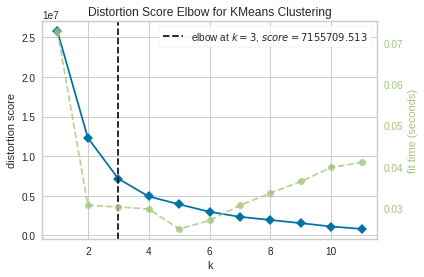

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(PP_predmety_rozlozeni_znamek)
visualizer.show()

In [74]:
km = KMeans(n_clusters=3).fit(PP_predmety_rozlozeni_znamek)

In [75]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [76]:
cluster_map

,data_index,cluster
0,BI-PA1,1
1,BI-PAI,0
2,BI-CAO,2
3,BI-PS1,1
4,BI-MLO,1
5,BI-ZMA,1
6,BI-PA2,1
7,BI-DBS,0
8,BI-SAP,0
9,BI-LIN,1


#### Přidání info o tom jestli jsou matematické nebo programovací

In [77]:
PP_predmety_rozlozeni_znamek['matematika'] = 0
PP_predmety_rozlozeni_znamek['programovani'] = 0
math_courses = ['BI-MLO', 'BI-ZMA', 'BI-LIN', 'BI-ZDM', 'BI-PST']
programming_courses = ['BI-PA1', 'BI-PA2', 'BI-PS1', 'BI-AG1', 'BI-OSY']

In [78]:
PP_predmety_rozlozeni_znamek.loc[PP_predmety_rozlozeni_znamek.index.isin(math_courses), 'matematika'] = 1 
PP_predmety_rozlozeni_znamek.loc[PP_predmety_rozlozeni_znamek.index.isin(programming_courses), 'programovani'] = 1 

In [79]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0,matematika,programovani
BI-PA1,377,328,616,840,694,2868,0,1
BI-PAI,159,472,1046,1247,791,975,0,0
BI-CAO,2381,1310,94,291,243,877,0,0
BI-PS1,489,406,679,907,943,2357,0,1
BI-MLO,224,457,899,1009,238,2116,1,0
BI-ZMA,178,433,732,801,173,2918,1,0
BI-PA2,316,280,422,568,169,1724,0,1
BI-DBS,362,653,709,642,267,729,0,0
BI-SAP,922,349,296,558,366,793,0,0
BI-LIN,70,142,412,680,356,2067,1,0


In [80]:
# normalizace
scaler = MinMaxScaler()
PP_predmety_rozlozeni_znamek = pd.DataFrame(scaler.fit_transform(PP_predmety_rozlozeni_znamek[PP_predmety_rozlozeni_znamek.columns]), index=PP_predmety_rozlozeni_znamek.index, columns=PP_predmety_rozlozeni_znamek.columns)

In [81]:
PP_predmety_rozlozeni_znamek

,1.0,1.5,2.0,2.5,3.0,4.0,matematika,programovani
BI-PA1,0.132843,0.221253,0.557613,0.650043,0.733974,0.981995,0.0,1.0
BI-PAI,0.038511,0.335448,1.000000,1.000000,0.837607,0.300324,0.0,0.0
BI-CAO,1.000000,1.000000,0.020576,0.177988,0.252137,0.265034,0.0,0.0
BI-PS1,0.181307,0.283109,0.622428,0.707653,1.000000,0.797983,0.0,1.0
BI-MLO,0.066638,0.323553,0.848765,0.795357,0.246795,0.711199,1.0,0.0
BI-ZMA,0.046733,0.304520,0.676955,0.616509,0.177350,1.000000,1.0,0.0
BI-PA2,0.106447,0.183188,0.358025,0.416165,0.173077,0.570040,0.0,1.0
BI-DBS,0.126352,0.478985,0.653292,0.479794,0.277778,0.211739,0.0,0.0
BI-SAP,0.368672,0.237906,0.228395,0.407567,0.383547,0.234786,0.0,0.0
BI-LIN,0.000000,0.073751,0.347737,0.512468,0.372863,0.693554,1.0,0.0


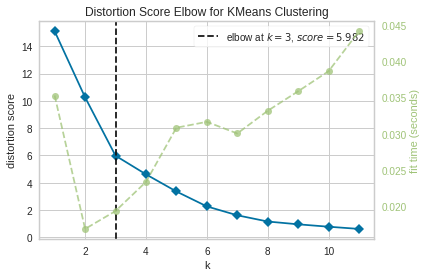

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(PP_predmety_rozlozeni_znamek)
visualizer.show()

##### Rozdělení do 3 shluků

In [83]:
km = KMeans(n_clusters=3).fit(PP_predmety_rozlozeni_znamek)

In [84]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [85]:
cluster_map

,data_index,cluster
0,BI-PA1,1
1,BI-PAI,2
2,BI-CAO,2
3,BI-PS1,1
4,BI-MLO,0
5,BI-ZMA,0
6,BI-PA2,1
7,BI-DBS,2
8,BI-SAP,2
9,BI-LIN,0


##### Rozdělení do 4 shluků

In [86]:
km = KMeans(n_clusters=4).fit(PP_predmety_rozlozeni_znamek)

In [87]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PP_predmety_rozlozeni_znamek.index.values
cluster_map['cluster'] = km.labels_

In [88]:
cluster_map[cluster_map.cluster == 0].data_index.unique()

array(['BI-MLO', 'BI-ZMA', 'BI-LIN', 'BI-ZDM', 'BI-PST'], dtype=object)

In [89]:
cluster_map[cluster_map.cluster == 1].data_index.unique()

array(['BI-CAO', 'BI-DBS', 'BI-SAP', 'BI-AAG', 'BI-PSI', 'BI-BEZ',
       'BI-DPR', 'BI-SI1.2', 'BI-EMP'], dtype=object)

In [90]:
cluster_map[cluster_map.cluster == 2].data_index.unique()

array(['BI-PA1', 'BI-PS1', 'BI-PA2', 'BI-AG1', 'BI-OSY'], dtype=object)

In [91]:
cluster_map[cluster_map.cluster == 3].data_index.unique()

array(['BI-PAI'], dtype=object)

### Matice klasifikace
* Řádky přestavují jednotlivé studenty, splopce PP předměty

#### Bakalář

In [92]:
#matice klasikace bakalar
courses_matrix_bak = pd.DataFrame(index=student_studium_id_bak, columns=courses_kod_bak)  

for index, row in klasifikace_fact_bak_09[klasifikace_fact_bak_09.predmet_id.isin(courses_id_bak)].iterrows():
    if not math.isnan(row['znamka']):
        courses_matrix_bak[courses_tran_id_kod[row['predmet_id']]][row['studium_id']] = row['znamka']

In [93]:
path_file = os.sep.join(['created_data', 'courses_matrix_bak.csv'])
courses_matrix_bak.to_csv(path_file, index=True, index_label='studium_id')

In [94]:
courses_matrix_bak

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
1578106,2,1.5,1.5,2,2,2,3,2,1.5,1,NaN,2,3,1.5,2,3,1.5,1.5,2.5,3
1584806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19374606,4,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4783406,4,3,1.5,4,2.5,2.5,NaN,NaN,4,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
8396706,4,4,4,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815106,2.5,2,3,2.5,2,2,3,2.5,3,3,NaN,3,3,3,3,4,2.5,2.5,2.5,4
6280106,1.5,2,2,1,2,4,2.5,4,2,4,NaN,4,4,4,4,NaN,NaN,NaN,NaN,NaN
3727706,1,2,1,1.5,1.5,1.5,1.5,1.5,1,1.5,NaN,1,2,1,2,1.5,1,1,1,1.5
2816306,1,4,4,4,2,2,4,NaN,4,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
courses_matrix_bak.dropna()

,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
12948006,3,2,1.5,2.5,1.5,2.5,2.5,2,1,3,2.5,2,2,2.5,2.5,2.5,2,1,2.5,1
12967806,1,2.5,1,2,2,3,1,2.5,1,2.5,1,2,2,1,2.5,1,2,1,2.5,2.5
14256606,1,2.5,1,1,1.5,1.5,1,2,2,2.5,2.5,1.5,2.5,1.5,1.5,2.5,2.5,1.5,1.5,2
9226006,2,1.5,1,1.5,1.5,1.5,3,2,1,3,1.5,2.5,2,3,2.5,2,2.5,1,2.5,1.5
12973406,2.5,2.5,1,3,2,1.5,2.5,2.5,1,2.5,2,2,2.5,2.5,2,2.5,2.5,1.5,1.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16730106,2,2.5,1,2,2,1.5,1.5,1.5,2.5,2,3,2.5,1.5,2.5,2,1,2.5,1,1.5,1.5
16750606,2.5,2.5,1,3,2.5,2,2,2.5,1.5,2,2.5,2.5,2,3,2.5,2,2.5,4,1.5,1
16752106,2.5,2,1,2.5,2.5,2.5,2,2.5,3,2.5,2.5,2.5,2,2.5,2,2,2.5,4,1,1.5
16731206,2.5,3,1,1,1,2,1,1.5,1.5,1.5,1.5,2,1.5,2.5,1.5,1.5,1.5,4,2,1


#### Magistr

In [96]:
#matice klasikace bakalar
courses_matrix_mag = pd.DataFrame(index=student_studium_id_mag, columns=courses_kod_mag)  

for index, row in klasifikace_fact_mag_09[klasifikace_fact_mag_09.predmet_id.isin(courses_id_mag)].iterrows():
    if not math.isnan(row['znamka']):
        courses_matrix_mag[courses_tran_id_kod[row['predmet_id']]][row['studium_id']] = row['znamka']

In [97]:
path_file = os.sep.join(['created_data', 'courses_matrix_mag.csv'])
courses_matrix_mag.to_csv(path_file, index=True, index_label='studium_id')

In [98]:
courses_matrix_mag

,MI-PAA,MI-MPI,MI-PDP.16,MI-SPI.16
9249706,NaN,4,NaN,NaN
8333406,NaN,4,NaN,NaN
9236906,2.5,2.5,NaN,NaN
9248206,2.5,3,NaN,NaN
13027706,2.5,2.5,NaN,4
...,...,...,...,...
5406106,2,3,NaN,NaN
5415906,1.5,2.5,NaN,NaN
8326106,2.5,2,NaN,NaN
8325206,1.5,2.5,NaN,NaN


In [99]:
courses_matrix_mag.dropna()

,MI-PAA,MI-MPI,MI-PDP.16,MI-SPI.16
14794806,3,3,2,2.5
13020006,2.5,2.5,2,2.5
13030006,2,2.5,1.5,3
13017206,2,3,1.5,2.5
13030106,1.5,2.5,2,3
...,...,...,...,...
16702406,2,1.5,1.5,1.5
16692806,2.5,4,3,1.5
17206906,2,4,2.5,2
17212606,1.5,4,2.5,2


### Úspěšní a neúspěšní studenti

In [100]:
# uspesni studenti bakalar
successful_students_bak = student_studium_dim_bak[(student_studium_dim_bak['ukonceni_zpusob'] == 1)]['studium_id'].unique()
# neuspesni studetni bakalar
failed_students_bak = student_studium_dim_bak[(student_studium_dim_bak['ukonceni_zpusob'] != 1)
                             & (student_studium_dim_bak['ukonceni_zpusob'].notna())]['studium_id'].unique()

# uspesni studenti magistr
successful_students_mag = student_studium_dim_mag[(student_studium_dim_mag['ukonceni_zpusob'] == 1)]['studium_id'].unique()
# neuspesni studenti magistr
failed_students_mag = student_studium_dim_mag[(student_studium_dim_mag['ukonceni_zpusob'] != 1)
                             & (student_studium_dim_mag['ukonceni_zpusob'].notna())]['studium_id'].unique()

In [101]:
path_file = os.sep.join(['created_data', 'failed_students_bak.npy'])
save(path_file, failed_students_bak)
path_file = os.sep.join(['created_data', 'successful_students_bak.npy'])
save(path_file, successful_students_bak)

path_file = os.sep.join(['created_data', 'failed_students_mag.npy'])
save(path_file, failed_students_mag)
path_file = os.sep.join(['created_data', 'successful_students_mag.npy'])
save(path_file, successful_students_mag)

#### Matrix_bak / matrix_mag
* Vytvoření datasetů pro predikci úspěchu dokončení studia
* Matrix_bak pro bakaláře
* Matrix_mag pro magistra
* Obsahují informace z studium_dim, student_dim, courses_matrix_bak/courses_matrix_mag

In [102]:
# studium_sub a student_sub

# nahrazeni datumu zahajeni studia a roku maturity, jejich rozdilem
# pokud chybi rok maturity ve studium_dim vezmu hodnotu z prihlaska_dim
# pokud jedna z hodnot chybi je hodnota nahrazena pomoci kNN
studium_sub = student_studium_dim[['studium_id', 'datum_zahajeni', 'rok_maturity']].copy(deep=True)

In [103]:
studium_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 0 to 16548
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   studium_id      12096 non-null  int64
 1   datum_zahajeni  12096 non-null  int64
 2   rok_maturity    12096 non-null  int64
dtypes: int64(3)
memory usage: 378.0 KB


In [104]:
studium_sub.rok_maturity.replace(0, np.nan, inplace=True)

In [105]:
studium_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 0 to 16548
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studium_id      12096 non-null  int64  
 1   datum_zahajeni  12096 non-null  int64  
 2   rok_maturity    9367 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 378.0 KB


In [106]:
# doplneni rokem maturity z prihlaska_dim
#rok_maturity_prihl_ids = prihlaska_dim[prihlaska_dim.rok_maturity.notna()].studium_id.unique()
students_not_rok_maturity = studium_sub[studium_sub.rok_maturity.isna()].studium_id.unique()
len(students_not_rok_maturity)
for student in students_not_rok_maturity:
    rok_z_prihlasky = prihlaska_dim[(prihlaska_dim.studium_id == student)].maturita_rok.dropna()
    if len(rok_z_prihlasky) > 0:
        studium_sub.loc[studium_sub.studium_id == student, 'rok_maturity'] = rok_z_prihlasky.values[0]

In [107]:
studium_sub.set_index('studium_id', inplace=True)

In [108]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
studium_sub = pd.DataFrame(imputer.fit_transform(studium_sub), index=studium_sub.index, columns=studium_sub.columns)

In [109]:
studium_sub

,datum_zahajeni,rok_maturity
studium_id,,
1578106,2009.0,2007.0
1584806,2009.0,2006.0
19374606,2021.0,2009.0
4783406,2011.0,2009.0
8396706,2013.0,2009.0
...,...,...
3727706,2010.0,2009.0
8325206,2013.0,2013.0
5411606,2011.0,2009.8


In [110]:
studium_sub = studium_sub.round({'rok_maturity': 0})

In [111]:
studium_sub['maturita_nastup_rozdil'] = studium_sub['datum_zahajeni'] - studium_sub['rok_maturity']

In [112]:
# nahrazeni sloupce statni_prislusnost_nazev, novym sloupcem je_cech (1 - pokud ano, 0 - pokud ne)
student_sub = student_studium_dim[['studium_id', 'pohlavi_kod', 'statni_prislusnost_nazev']].copy(deep=True)
student_sub['je_cech'] = math.nan
student_sub.loc[student_sub.statni_prislusnost_nazev == 'Česko', 'je_cech'] = 1
student_sub.loc[student_sub.statni_prislusnost_nazev != 'Česko', 'je_cech'] = 0
student_sub.loc[student_sub.statni_prislusnost_nazev.isna(), 'je_cech'] = 2
student_sub = student_sub.drop(columns='statni_prislusnost_nazev')

In [113]:
# spojeni student_sub a studium_sub
matrix_bak_sub = student_sub.merge(studium_sub, how='inner', left_on='studium_id', right_index=True)

# pripojeni info o stredni skole
# pripojeni info o tom jestli je z Prahy
# pripojeni info o prijimackach
matrix_bak_sub = matrix_bak_sub.merge(student_studium_dim[['studium_id', 'gymnazium', 'praha', 'scio', 'olym', 'zkouska', 'prominuti']], how='inner', on='studium_id')

In [114]:
matrix_bak_sub

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
0,1578106,M,0.0,2009.0,2007.0,2.0,0,2,0,0,0,0
1,1584806,M,0.0,2009.0,2006.0,3.0,0,2,0,0,0,0
2,19374606,M,1.0,2021.0,2009.0,12.0,1,0,0,1,0,0
3,4783406,M,1.0,2011.0,2009.0,2.0,1,0,0,0,0,0
4,8396706,Z,1.0,2013.0,2009.0,4.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12091,3727706,M,1.0,2010.0,2009.0,1.0,0,1,0,0,0,0
12092,8325206,M,1.0,2013.0,2013.0,0.0,2,1,0,0,0,0
12093,5411606,M,1.0,2011.0,2010.0,1.0,2,0,0,0,0,0
12094,2816306,M,1.0,2009.0,1999.0,10.0,0,0,0,0,0,0


In [115]:
# prejmenovani M muze na 0 a Z zena na 1
matrix_bak_sub = matrix_bak_sub.replace('M', 0)
matrix_bak_sub = matrix_bak_sub.replace('Z', 1)

In [116]:
# zmena atributu na int hodnoty
matrix_bak_sub['rok_maturity'] = matrix_bak_sub['rok_maturity'].astype('int')
matrix_bak_sub['je_cech'] = matrix_bak_sub['je_cech'].astype('int')
matrix_bak_sub['datum_zahajeni'] = matrix_bak_sub['datum_zahajeni'].astype('int')
matrix_bak_sub['maturita_nastup_rozdil'] = matrix_bak_sub['maturita_nastup_rozdil'].astype('int')

In [117]:
len(matrix_bak_sub[matrix_bak_sub.pohlavi_kod.isna()])

1

In [118]:
matrix_bak_sub

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
0,1578106,0.0,0,2009,2007,2,0,2,0,0,0,0
1,1584806,0.0,0,2009,2006,3,0,2,0,0,0,0
2,19374606,0.0,1,2021,2009,12,1,0,0,1,0,0
3,4783406,0.0,1,2011,2009,2,1,0,0,0,0,0
4,8396706,1.0,1,2013,2009,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12091,3727706,0.0,1,2010,2009,1,0,1,0,0,0,0
12092,8325206,0.0,1,2013,2013,0,2,1,0,0,0,0
12093,5411606,0.0,1,2011,2010,1,2,0,0,0,0,0
12094,2816306,0.0,1,2009,1999,10,0,0,0,0,0,0


In [119]:
# odstraneni duplikatu
matrix_bak_sub.drop_duplicates(subset=['studium_id'], inplace=True)

##### Bakalář všechny PP předměty

In [120]:
# odstraneni duplikatu
ids_bak = matrix_bak_sub.index
matrix_bak_sub[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti


In [121]:
matrix_bak = matrix_bak_sub.copy(deep=True)

# doplneni sloupce s infem o uspesne/neuspesnem dostudovani, beru pouze uz dostudovane
matrix_bak['dostudoval_uspesne'] = 0

matrix_bak.loc[matrix_bak.studium_id.isin(successful_students_bak), 'dostudoval_uspesne'] = 1
matrix_bak.drop(matrix_bak[(~matrix_bak.studium_id.isin(failed_students_bak))
                          & (~matrix_bak.studium_id.isin(successful_students_bak))].index, inplace=True)

In [122]:
len(matrix_bak[matrix_bak.pohlavi_kod.isna()])

0

In [123]:
# odstraneni duplikatu
ids_bak = matrix_bak.index
matrix_bak[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne


In [124]:
# pridani znamek z PP predmetu
matrix_bak = matrix_bak.merge(courses_matrix_bak, how='inner', left_on='studium_id', right_index=True)

In [125]:
# odstraneni duplikatu
ids_bak = matrix_bak.index
matrix_bak[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,studium_id,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP


In [126]:
matrix_bak['pohlavi_kod'] = matrix_bak['pohlavi_kod'].astype('int')

In [127]:
# nastaveni indexu
matrix_bak.set_index('studium_id', inplace=True)
ids_bak = matrix_bak.index
matrix_bak[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [128]:
print(len(matrix_bak[(matrix_bak['dostudoval_uspesne'] == 1)
          & (matrix_bak['BI-AG1'].notna())]))
print(len(matrix_bak[(matrix_bak['dostudoval_uspesne'] == 1)]))
print(len(matrix_bak[(matrix_bak['BI-AG1'].notna())]))
print(len(matrix_bak[(matrix_bak['dostudoval_uspesne'] == 1)
          & (matrix_bak['BI-DPR'].notna())]))
print(len(matrix_bak[(matrix_bak['BI-DPR'].notna())]))
ids_bak = matrix_bak.index
matrix_bak[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

835
2113
1638
2113
2407


,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [129]:
path_file = os.sep.join(['created_data', 'matrix_bak.csv'])
matrix_bak.to_csv(path_file, index=True, index_label='studium_id')

In [130]:
matrix_bak[matrix_bak.dostudoval_uspesne == 1]

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1578106,0,0,2009,2007,2,0,2,0,0,0,0,1,2,1.5,1.5,2,2,2,3,2,1.5,1,NaN,2,3,1.5,2,3,1.5,1.5,2.5,3
4047706,0,1,2010,2009,1,1,0,0,0,0,0,1,3,3,1.5,3,1.5,1.5,3,2,1.5,2.5,NaN,2.5,2,2.5,2.5,2.5,2,1.5,1.5,2.5
12375406,0,1,2015,2009,6,0,1,0,0,0,0,1,2.5,2,2.5,3,2.5,2.5,3,2.5,2.5,2.5,NaN,3,3,3,2.5,2.5,2,1,2,2
1565606,0,1,2009,2009,0,1,1,0,0,0,0,1,2.5,2,1,3,2.5,1.5,2.5,1.5,2.5,3,NaN,1.5,2.5,2.5,2,1.5,1,1.5,3,2
1565706,0,1,2009,2009,0,1,0,0,0,0,0,1,1,1.5,1,3,1.5,2,2.5,1,1.5,2,NaN,2,2.5,3,2.5,1.5,2,1.5,2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755006,0,1,2009,2008,1,2,0,1,0,0,0,1,1,1,1,1.5,2,2.5,2,1.5,1.5,3,NaN,2,2,1.5,2,2.5,1.5,1.5,2,2.5
4220606,0,1,2010,2010,0,1,1,1,0,0,0,1,2,1.5,2,2,3,2,2.5,2.5,2.5,3,NaN,1.5,2.5,1.5,3,3,2.5,1.5,2,2.5
4224106,0,1,2010,2010,0,1,0,1,0,0,0,1,1,2.5,2,3,3,2.5,2.5,2,2.5,3,NaN,2.5,3,3,2.5,3,2.5,1.5,2.5,2


### Pouze studenti s nástupem 2015 a výš

In [131]:
matrix_bak_2015 = matrix_bak[matrix_bak.datum_zahajeni >= 2015]

In [132]:
ids_bak = matrix_bak_2015.index
matrix_bak_2015[ids_bak.isin(ids_bak[ids_bak.duplicated()])]

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [133]:
matrix_bak_2015[(matrix_bak_2015.dostudoval_uspesne == 1) & (matrix_bak_2015['BI-AG1'].isna())]

,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti,dostudoval_uspesne,BI-PA1,BI-PAI,BI-CAO,BI-PS1,BI-MLO,BI-ZMA,BI-PA2,BI-DBS,BI-SAP,BI-LIN,BI-AG1,BI-AAG,BI-ZDM,BI-OSY,BI-PSI,BI-BEZ,BI-PST,BI-DPR,BI-SI1.2,BI-EMP
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12375406,0,1,2015,2009,6,0,1,0,0,0,0,1,2.5,2,2.5,3,2.5,2.5,3,2.5,2.5,2.5,NaN,3,3,3,2.5,2.5,2,1,2,2
11719706,0,1,2015,2010,5,0,0,0,0,0,0,1,1,2.5,1.5,2,2.5,2,3,2,1,3,NaN,2.5,2.5,1.5,2.5,3,2.5,1.5,2,1
13016006,0,1,2016,2010,6,1,0,0,0,0,0,1,1,3,1,3,1.5,2.5,2,2.5,1,2.5,NaN,1.5,3,2,2,2.5,3,2,2,1.5
13518506,0,1,2016,2011,5,0,0,0,0,0,0,1,1.5,2,1,2,2,2.5,3,2.5,1.5,2.5,NaN,2.5,3,2,2,2.5,2,2.5,2.5,1.5
11727206,0,1,2015,2011,4,1,1,0,0,0,0,1,1,2.5,1,2,2,2,1,2,1.5,2.5,NaN,2.5,2.5,2.5,2,3,2.5,2.5,2,1.5
13512006,0,1,2016,2011,5,0,1,0,0,0,0,1,1,1.5,1,1,1.5,1.5,1,1,1,1,NaN,1.5,1,1,1,1,2,1,1.5,1.5
11742506,0,1,2015,2011,4,1,0,0,0,0,0,1,2,2,1.5,2,2.5,2,2.5,2.5,2,2.5,NaN,3,2.5,2,2.5,2.5,2,1,1.5,1
13518606,0,1,2016,2011,5,0,0,0,0,0,0,1,2,2.5,1,2,2,2.5,2,1.5,1.5,2,NaN,2.5,2.5,2.5,2,2.5,2.5,1,2,1.5
11686106,0,1,2015,2012,3,1,0,0,0,0,0,1,2.5,2.5,1,2,2,2,2.5,1.5,2,2.5,NaN,2,2,3,2,2,2,1.5,2.5,1


In [134]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015.to_csv(path_file, index=True, index_label='studium_id')

## Rozdělení po semestrech

In [135]:
personal_attributes = ['pohlavi_kod', 'je_cech', 'datum_zahajeni', 'rok_maturity', 'maturita_nastup_rozdil',
                        'gymnazium', 'praha', 'scio', 'olym', 'zkouska', 'prominuti']
target = ['dostudoval_uspesne']

In [136]:
# pouze studenti s rokem nastupu 2015 a vys
student_studium_dim_2015 = student_studium_dim[student_studium_dim.datum_zahajeni >= 2015].copy(deep=True)

In [137]:
# prida ke kazdemu studentovi info o kodech jednotlivych semestru
for year in range(15, 23):
    for semester in range (0,6):
        semester_name = f"semestr_{semester+1}"
        student_studium_dim_2015.loc[(student_studium_dim_2015.datum_zahajeni == year+2000), semester_name] = f"B{year+semester//2}{semester%2+1}"

### Počet kreditů v jednotlivých semestrech

In [138]:
student_studium_dim_2015['semestr_1_kredity'] = 0
student_studium_dim_2015['semestr_2_kredity'] = 0
student_studium_dim_2015['semestr_3_kredity'] = 0
student_studium_dim_2015['semestr_4_kredity'] = 0
student_studium_dim_2015['semestr_5_kredity'] = 0
student_studium_dim_2015['semestr_6_kredity'] = 0

all_courses = predmet_dim.predmet_id.unique()
all_students_2015 = student_studium_dim_2015.studium_id.unique()
klasifikace = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id.str.startswith('B'))
                                                 & (klasifikace_fact_changed.znamka != 4)
                                                 & (klasifikace_fact_changed.znamka.notna())
                                                 & (klasifikace_fact_changed.studium_id.isin(all_students_2015))]
for course in all_courses:
    course_credits = predmet_dim[predmet_dim.predmet_id == course].iloc[0]['pocet_kreditu']
    course_klasifikace = klasifikace[(klasifikace.predmet_id == course)]
    
    for index, row in course_klasifikace.iterrows():
        semestr = row.semestr_id
        student_id = row.studium_id
        
        student = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == student_id), :]
        semestr = int(semestr[1:])-(student.iloc[0]['datum_zahajeni']-2000)*10
        semestr = semestr//10 * 2 + semestr%10
        if semestr > 0 and semestr < 7:
            student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == student_id), f'semestr_{semestr}_kredity'] += course_credits

In [139]:
# Aktualni a predchozi semestr nebereme v potaz, protoze nemuzeme zjistit, zda student prosel dalsim semestrem
valid_semesters = ['B151', 'B152', 'B161', 'B162', 'B171', 'B172', 'B181', 'B182', 'B191', 'B192', 'B201', 'B202']

### První semestr

In [140]:
student_studium_dim_2015

,studium_id,peridno,pohlavi_kod,datum_narozeni,misto_narozeni,statni_prislusnost_nazev,stat_narozeni_nazev,kod_obce,kod_okresu,kod_zeme,psc,typ_programu,forma_studia,datum_zahajeni,datum_ukonceni,rocnik,studijni_stav,studuje,jazyk_vyuky,ukonceni_zpusob,rok_maturity,odkud_skola_kod,gymnazium,praha,olym,scio,zkouska,prominuti,semestr_1,semestr_2,semestr_3,semestr_4,semestr_5,semestr_6,semestr_1_kredity,semestr_2_kredity,semestr_3_kredity,semestr_4_kredity,semestr_5_kredity,semestr_6_kredity
6,19374606,1304906,M,1989-07-19,Praha,Česko,Česko,539627.0,3210.0,203,25263,B,P,2021,2021,1.0,3,K,CS,2.0,2009,61388246,1,0,1,0,0,0,B211,B212,B221,B222,B231,B232,0.0,0.0,0.0,0.0,0.0,0.0
25,13027706,1333906,M,1989-10-03,Šternberk,Česko,Česko,564991.0,3209.0,203,25084,N,P,2016,2017,1.0,3,K,CS,2.0,0,0,2,0,0,0,0,0,B161,B162,B171,B172,B181,B182,25.0,10.0,0.0,0.0,0.0,0.0
46,12375406,1586406,M,1989-11-12,Hodonín,Česko,Česko,554782.0,3100.0,203,14000,B,P,2015,2017,2.0,17,K,CS,1.0,2009,559539,0,1,0,0,0,0,B151,B152,B161,B162,B171,B172,20.0,13.0,0.0,0.0,0.0,0.0
49,14794806,1586406,M,1989-11-12,Hodonín,Česko,Česko,554782.0,3100.0,203,14000,N,P,2017,2020,3.0,16,K,CS,1.0,0,0,2,1,0,0,0,0,B171,B172,B181,B182,B191,B192,27.0,20.0,17.0,28.0,10.0,0.0
94,11644206,1600206,M,1989-09-10,Hradec Králové,Česko,Česko,574856.0,3606.0,203,53345,N,P,2015,2016,1.0,3,K,CS,2.0,0,0,2,0,0,0,0,0,B151,B152,B161,B162,B171,B172,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16410,13018606,364455000,M,1988-03-14,Praha,Česko,Česko,539325.0,3210.0,203,25242,N,P,2016,2017,1.0,3,K,CS,2.0,0,0,2,0,0,0,0,0,B161,B162,B171,B172,B181,B182,4.0,0.0,0.0,0.0,0.0,0.0
16445,13025406,364704000,M,1989-03-08,Hradec Králové,Česko,Česko,569810.0,3602.0,203,50002,N,P,2016,2017,1.0,3,K,CS,2.0,0,0,2,0,0,0,0,0,B161,B162,B171,B172,B181,B182,13.0,0.0,0.0,0.0,0.0,0.0
16446,14310706,364704000,M,1989-03-08,Hradec Králové,Česko,Česko,569810.0,3602.0,203,50002,N,P,2017,2018,1.0,16,K,CS,1.0,0,0,2,0,0,0,0,0,B171,B172,B181,B182,B191,B192,0.0,0.0,0.0,0.0,0.0,0.0
16456,14276306,364731000,M,1989-05-30,Ústí nad Labem,Česko,Česko,562971.0,3503.0,203,43001,N,P,2017,2018,1.0,3,K,CS,2.0,0,0,2,0,0,0,0,0,B171,B172,B181,B182,B191,B192,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Matrix na zjisteni pruchodu prvnim semestrem

# Bereme v potaz jen studenty bakalarskeho studia
# Neberu v potaz studenty, kteri uspesne dokoncili za mene nez tri roky (naprosta vetsina budou opakovaci)
matrix_semestr_1 = pd.DataFrame(index=student_studium_dim_2015.loc[(student_studium_dim_2015.typ_programu == 'B') &
                                                                   ((student_studium_dim_2015.ukonceni_zpusob != 1) | (student_studium_dim_2015.rocnik >=3))
                                    , 'studium_id'], columns = [])

# Zde se muzu oprit jen o pripravu na matematiku, demograficka data, atd. 

matrix_semestr_1

""
studium_id
19374606
11736906
14267106
12032306
15613006
...
19830306
19963206
11677106


In [142]:
# Vyhodnoceni dokonceni semestru

# Jak resit okrajove pripady? Jsou lidi kteri prolezou i s mene nez 15 kredity - napr. protoze meli
# spoustu uznanych predmetu (A00000) z minuleho studia
# Plus pri covidu se snizoval pocet kreditu k pruchodu
#
# Vyresit opakovace, kteri prvni dva semestry maji malo kreditu, ale uspesne ukonci statni zkouskou
# Obecne s opakovaci je problem, maji zapsany predmety do semestru A0000 a prochazeji i s mene kredity
# Aby to neovlivnovalo uceni modelu, tak bych resila jen jestli maji adekvatni pocet kreditu na pokracovani

for index, row in matrix_semestr_1.iterrows():
    pocet_kreditu_semestr_1 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1_kredity'].iloc[0]
    
    if pocet_kreditu_semestr_1 < 15:
        matrix_semestr_1.loc[(matrix_semestr_1.index == index), 'dokoncil_semestr'] = 0           
    else:
        matrix_semestr_1.loc[(matrix_semestr_1.index == index), 'dokoncil_semestr'] = 1

In [143]:
matrix_semestr_1

,dokoncil_semestr
studium_id,
19374606,0.0
11736906,0.0
14267106,1.0
12032306,0.0
15613006,1.0
...,...
19830306,1.0
19963206,1.0
11677106,0.0


In [156]:
# pridani osobnich informaci o studentech
matrix_semestr_1_personal = matrix_semestr_1.merge(matrix_bak_2015[personal_attributes], left_index=True, right_index=True, how='inner')

In [157]:
matrix_semestr_1_personal

,dokoncil_semestr,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,
19374606,0.0,0,1,2021,2009,12,1,0,0,1,0,0
11736906,0.0,0,1,2015,2009,6,1,0,0,0,0,0
12032306,0.0,0,1,2015,2007,8,0,1,0,0,0,0
15613006,1.0,0,1,2018,2009,9,1,1,0,0,0,0
12948006,1.0,1,1,2016,2010,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19813506,0.0,0,1,2021,2020,1,1,0,0,1,0,0
19814506,0.0,0,1,2021,2021,0,1,1,1,1,0,0
11677106,0.0,0,1,2015,2003,12,0,1,0,0,0,0


In [158]:
path_file = os.sep.join(['created_data', 'matrix_semestr_1_personal.csv'])
matrix_semestr_1_personal.to_csv(path_file, index=True, index_label='studium_id')

### Druhý semestr

In [146]:
# Matrix na zjisteni pruchodu druhym semestrem, berou se v potaz predmety s prvniho semestru

# Prekopiruji uspesne studenty z prvniho semestru    
matrix_semestr_2 = matrix_semestr_1[(matrix_semestr_1.dokoncil_semestr == 1)].copy(deep=True)


for index in matrix_semestr_2.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1'].iloc[0]
    # Studoval student dany semestr ve validnim semestru (tedy mame pro nej jiz vysledky v datech a zname i nadchazejici semestr)
    if semester_name not in valid_semesters:
        continue
    # Klasifikace studenta za dany semestr
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id == semester_name)]
    # Znamky za prvni semestr
    for course in courses_1:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)]
        # Student dany predmet studoval
        if len(course_classification) == 1:
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_semestr"] = 1
        # Student dany predmet tento semestr nemel, vyplnime do matrixu nuly
        if len(course_classification) == 0:
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_znamka"] = 0
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_poradi_zapisu"] = 0
            matrix_semestr_2.loc[(matrix_semestr_2.index == index), f"{course}_semestr"] = 0            

# Vyhodit radky s NaN hodnoty - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_2 = matrix_semestr_2.dropna()               
matrix_semestr_2

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr
studium_id,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
15613006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18588406,1.0,4.0,1.0,1.0,3.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0,2.5,1.0,1.0
18583806,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0
18589406,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0


In [147]:
# Vyhodnoceni dokonceni semestru
for index, row in matrix_semestr_2.iterrows():
    pocet_kreditu_semestr_1 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_1_kredity'].iloc[0]
    pocet_kreditu_semestr_2 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2_kredity'].iloc[0]
    
    matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'pocet_kreditu_semestr_1'] = pocet_kreditu_semestr_1
 
    if pocet_kreditu_semestr_1 + pocet_kreditu_semestr_2 < 40:
        matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_2.loc[(matrix_semestr_2.index == index), 'dokoncil_semestr'] = 1

In [148]:
matrix_semestr_2

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1
studium_id,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,24.0
15613006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18588406,0.0,4.0,1.0,1.0,3.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,3.0,1.0,1.0,2.5,1.0,1.0,19.0
18583806,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,19.0
18589406,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,30.0


In [159]:
# pridani osobnich informaci o studentech
matrix_semestr_2_personal = matrix_semestr_2.merge(matrix_bak_2015[personal_attributes], left_index=True, right_index=True, how='inner')

In [160]:
matrix_semestr_2_personal

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15613006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0,1,2018,2009,9,1,1,0,0,0,0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,1,1,2016,2010,6,1,0,0,0,0,0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,0,1,2016,2010,6,0,0,0,0,0,0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,0,1,2016,2010,6,1,0,0,0,0,0
11727206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0,1,2015,2011,4,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18590906,0.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,24.0,0,1,2020,2020,0,0,0,1,1,0,0
18588006,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,4.0,1.0,1.0,24.0,0,1,2020,2020,0,0,0,1,1,1,0
18602506,0.0,2.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,24.0,0,1,2020,2020,0,1,1,1,0,1,1


In [161]:
path_file = os.sep.join(['created_data', 'matrix_semestr_2_personal.csv'])
matrix_semestr_2_personal.to_csv(path_file, index=True, index_label='studium_id')

### Třetí semestr semestr

In [149]:
# treti semestr
matrix_semestr_3 = matrix_semestr_2[(matrix_semestr_2.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_2:
    matrix_semestr_3[f"{course}_znamka"] = np.nan
    matrix_semestr_3[f"{course}_semestr"] = np.nan
    matrix_semestr_3[f"{course}_poradi_zapisu"] = np.nan
    
courses_12 = list(courses_1)
courses_12.extend(courses_2)

for index in matrix_semestr_3.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id == semester_name)]
    # Znamky za druhy semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_12:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)]
        if len(course_classification) == 1:
            matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
            matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_semestr"] = 1
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_3.loc[(matrix_semestr_3.index == index) & (matrix_semestr_3[f"{course}_znamka"] != 0) & (matrix_semestr_3[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_znamka"] = 0
                matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_poradi_zapisu"] = 0
                matrix_semestr_3.loc[(matrix_semestr_3.index == index), f"{course}_semestr"] = 0            

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_3 = matrix_semestr_3.dropna()               
matrix_semestr_3

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0
11727206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604406,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,24.0,4.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0
18594806,1.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0
18583806,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,19.0,2.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0


In [150]:
# Vyhodnoceni dokonceni tretiho semestru

# poznam podle toho, zda mel ctvrty semestr jeste zapsany nejaky predmet
for index, row in matrix_semestr_3.iterrows():
    pocet_kreditu_semestr_3 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_3_kredity'].iloc[0]
    matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'pocet_kreditu_semestr_2'] = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_2_kredity'].iloc[0]
    semestr_4 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4'].iloc[0]
    
    if len(klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index) 
                                    & (klasifikace_fact_changed.semestr_id == semestr_4)]) == 0:
        matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_3.loc[(matrix_semestr_3.index == index), 'dokoncil_semestr'] = 1

In [162]:
matrix_semestr_3

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,22.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,17.0
11727206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604406,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,24.0,4.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,22.0
18594806,1.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,23.0
18583806,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,19.0,2.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,21.0


In [163]:
# pridani osobnich informaci o studentech
matrix_semestr_3_personal = matrix_semestr_3.merge(matrix_bak_2015[personal_attributes], left_index=True, right_index=True, how='inner')

In [164]:
matrix_semestr_3_personal

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,1,1,2016,2010,6,1,0,0,0,0,0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0,0,1,2016,2010,6,0,0,0,0,0,0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,17.0,0,1,2016,2010,6,1,0,0,0,0,0
11727206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0,22.0,0,1,2015,2011,4,1,1,0,0,0,0
12973406,1.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,4.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,19.0,0,1,2016,2011,5,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17952706,0.0,2.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,24.0,3.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,23.0,0,1,2020,2020,0,1,0,1,1,0,0
17920706,0.0,2.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,24.0,2.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,19.0,0,1,2020,2020,0,1,0,1,1,0,0
17925006,0.0,2.0,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,19.0,3.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,23.0,0,1,2020,2020,0,1,0,1,1,0,0


In [165]:
path_file = os.sep.join(['created_data', 'matrix_semestr_3_personal.csv'])
matrix_semestr_3_personal.to_csv(path_file, index=True, index_label='studium_id')

### Čtvrtý semestr

In [151]:
# ctvrty semestr
matrix_semestr_4 = matrix_semestr_3[(matrix_semestr_3.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_3:
    matrix_semestr_4[f"{course}_znamka"] = np.nan
    matrix_semestr_4[f"{course}_semestr"] = np.nan
    matrix_semestr_4[f"{course}_poradi_zapisu"] = np.nan
    
courses_123 = list(courses_12)
courses_123.extend(courses_3)

for index in matrix_semestr_4.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_3'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id == semester_name)]
    # Znamky za treti semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_123:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)]
        if len(course_classification) == 1:
            matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
            matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_semestr"] = 1
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_4.loc[(matrix_semestr_4.index == index) & (matrix_semestr_4[f"{course}_znamka"] != 0) & (matrix_semestr_4[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_znamka"] = 0
                matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_poradi_zapisu"] = 0
                matrix_semestr_4.loc[(matrix_semestr_4.index == index), f"{course}_semestr"] = 0            

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_4 = matrix_semestr_4.dropna()               
matrix_semestr_4

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0
12967806,1.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
13016006,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0
11727206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17330706,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,2.0,1.0,1.0,13.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0
17321606,1.0,2.5,2.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,24.0,0.0,0.0,0.0,2.5,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,25.0,2.5,1.0,1.0,2.5,1.0,1.0,0.0,0.0,0.0
17325706,1.0,3.0,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,30.0,1.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Vyhodnoceni dokonceni ctvrteho semestru

# Ze tretiho a ctvrteho semestru musi mit student aspon 40 kreditu
for index, row in matrix_semestr_4.iterrows():
    pocet_kreditu_semestr_3 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_3_kredity'].iloc[0]
    pocet_kreditu_semestr_4 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4_kredity'].iloc[0]
        
    matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'pocet_kreditu_semestr_3'] = pocet_kreditu_semestr_3
    if pocet_kreditu_semestr_3 + pocet_kreditu_semestr_4 < 40:
        matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_4.loc[(matrix_semestr_4.index == index), 'dokoncil_semestr'] = 1

In [166]:
matrix_semestr_4

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,35.0
12967806,0.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,14.0
13016006,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,20.0
11727206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17330706,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,2.0,1.0,1.0,13.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0
17321606,1.0,2.5,2.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,24.0,0.0,0.0,0.0,2.5,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,25.0,2.5,1.0,1.0,2.5,1.0,1.0,0.0,0.0,0.0,29.0
17325706,0.0,3.0,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,30.0,1.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
# pridani osobnich informaci o studentech
matrix_semestr_4_personal = matrix_semestr_4.merge(matrix_bak_2015[personal_attributes], left_index=True, right_index=True, how='inner')

In [168]:
matrix_semestr_4_personal

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,35.0,1,1,2016,2010,6,1,0,0,0,0,0
12967806,0.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,14.0,0,1,2016,2010,6,0,0,0,0,0,0
13016006,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,2.5,1.0,1.0,25.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,20.0,0,1,2016,2010,6,1,0,0,0,0,0
11727206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,1.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2015,2011,4,1,1,0,0,0,0
12973406,1.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,4.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,19.0,2.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,26.0,0,1,2016,2011,5,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16718306,1.0,2.5,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,2.0,1.0,24.0,0.0,0.0,0.0,2.0,1.0,1.0,2.5,1.0,1.0,4.0,1.0,1.0,16.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,15.0,1,0,2019,2019,0,0,2,0,0,0,0
17332706,0.0,2.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,3.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,30.0,4.0,1.0,1.0,3.0,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,23.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,8.0,0,0,2019,2018,1,0,2,0,0,0,0
17336206,0.0,2.0,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,4.0,2.0,1.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,4.0,1.0,1.0,23.0,4.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0,12.0,0,1,2019,2019,0,0,0,0,0,0,0


In [169]:
path_file = os.sep.join(['created_data', 'matrix_semestr_4_personal.csv'])
matrix_semestr_4_personal.to_csv(path_file, index=True, index_label='studium_id')

### Pátý semestr

In [153]:
# paty semestr
matrix_semestr_5 = matrix_semestr_4[(matrix_semestr_4.dokoncil_semestr == 1)].copy(deep=True)

for course in courses_4:
    matrix_semestr_5[f"{course}_znamka"] = np.nan
    matrix_semestr_5[f"{course}_semestr"] = np.nan
    matrix_semestr_5[f"{course}_poradi_zapisu"] = np.nan
    
courses_1234 = list(courses_123)
courses_1234.extend(courses_4)

for index in matrix_semestr_5.index.unique():
    semester_name = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4'].iloc[0]
    if semester_name not in valid_semesters:
        continue
    classification = klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index)
                                  & (klasifikace_fact_changed.semestr_id == semester_name)]
    # Znamky za ctvrty semestr, zkontrolovat i zda si nezapsali znova predmety z predchozich semestru
    for course in courses_1234:
        course_id = courses_tran_kod_id[course]
        course_classification = classification[(classification.predmet_id == course_id)]
        if len(course_classification) == 1:
            matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_znamka"] = course_classification.iloc[0]['znamka']
            matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_poradi_zapisu"] = course_classification.iloc[0]['poradi_zapisu']
            matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_semestr"] = 1
        if len(course_classification) == 0:
            # Neprepsat si znamky z minulych semestru
            if len(matrix_semestr_5.loc[(matrix_semestr_5.index == index) & (matrix_semestr_5[f"{course}_znamka"] != 0) & (matrix_semestr_5[f"{course}_znamka"].notna())]) != 1:
                matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_znamka"] = 0
                matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_poradi_zapisu"] = 0
                matrix_semestr_5.loc[(matrix_semestr_5.index == index), f"{course}_semestr"] = 0            

# Vyhodit NaN řádky - jsou to studenti, kteri dany nebo nasledujici semestr jeste nestudovali (budou je mit v budoucnu)
matrix_semestr_5 = matrix_semestr_5.dropna()               
matrix_semestr_5

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_semestr,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_semestr,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_semestr,BI-BEZ_poradi_zapisu
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,35.0,2.5,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0
12973406,1.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,2.5,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,19.0,2.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,26.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0
12964406,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,16.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,22.0,4.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0
13013306,1.0,1.5,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,27.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,30.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321906,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,30.0,2.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,26.0,1.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,33.0,2.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
17330706,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,2.0,1.0,2.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,13.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0
17321606,1.0,2.5,2.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,24.0,4.0,1.0,1.0,2.5,1.0,1.0,3.0,1.0,1.0,3.0,1.0,2.0,25.0,2.5,1.0,1.0,2.5,1.0,1.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0


In [154]:
# Vyhodnoceni dokonceni pateho semestru

# poznam podle toho, zda mel sesty semestr jeste zapsany nejaky predmet
for index, row in matrix_semestr_5.iterrows():
    pocet_kreditu_semestr_5 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_5_kredity'].iloc[0]
    matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'pocet_kreditu_semestr_4'] = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_4_kredity'].iloc[0]
    semestr_6 = student_studium_dim_2015.loc[(student_studium_dim_2015.studium_id == index), 'semestr_6'].iloc[0]
    
    if len(klasifikace_fact_changed[(klasifikace_fact_changed.studium_id == index) 
                                    & (klasifikace_fact_changed.semestr_id == semestr_6)]) == 0:
        matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'dokoncil_semestr'] = 0          
    else:
        matrix_semestr_5.loc[(matrix_semestr_5.index == index), 'dokoncil_semestr'] = 1

In [155]:
matrix_semestr_5

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_semestr,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_semestr,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_semestr,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14267106,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,35.0,2.5,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,34.0
12973406,1.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,2.5,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,19.0,2.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,26.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,33.0
12964406,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,16.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,22.0,4.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,28.0
13013306,1.0,1.5,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,27.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,30.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321906,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,30.0,2.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,26.0,1.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,33.0,2.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,25.0
17330706,1.0,1.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,2.0,1.0,2.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,13.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,33.0
17321606,1.0,2.5,2.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,24.0,4.0,1.0,1.0,2.5,1.0,1.0,3.0,1.0,1.0,3.0,1.0,2.0,25.0,2.5,1.0,1.0,2.5,1.0,1.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,19.0


In [170]:
# pridani osobnich informaci o studentech
matrix_semestr_5_personal = matrix_semestr_5.merge(matrix_bak_2015[personal_attributes], left_index=True, right_index=True, how='inner')

In [171]:
matrix_semestr_5_personal

,dokoncil_semestr,BI-PA1_znamka,BI-PA1_poradi_zapisu,BI-PA1_semestr,BI-PAI_znamka,BI-PAI_poradi_zapisu,BI-PAI_semestr,BI-CAO_znamka,BI-CAO_poradi_zapisu,BI-CAO_semestr,BI-PS1_znamka,BI-PS1_poradi_zapisu,BI-PS1_semestr,BI-MLO_znamka,BI-MLO_poradi_zapisu,BI-MLO_semestr,BI-ZMA_znamka,BI-ZMA_poradi_zapisu,BI-ZMA_semestr,pocet_kreditu_semestr_1,BI-PA2_znamka,BI-PA2_semestr,BI-PA2_poradi_zapisu,BI-DBS_znamka,BI-DBS_semestr,BI-DBS_poradi_zapisu,BI-SAP_znamka,BI-SAP_semestr,BI-SAP_poradi_zapisu,BI-LIN_znamka,BI-LIN_semestr,BI-LIN_poradi_zapisu,pocet_kreditu_semestr_2,BI-AAG_znamka,BI-AAG_semestr,BI-AAG_poradi_zapisu,BI-ZDM_znamka,BI-ZDM_semestr,BI-ZDM_poradi_zapisu,BI-AG1_znamka,BI-AG1_semestr,BI-AG1_poradi_zapisu,pocet_kreditu_semestr_3,BI-OSY_znamka,BI-OSY_semestr,BI-OSY_poradi_zapisu,BI-PSI_znamka,BI-PSI_semestr,BI-PSI_poradi_zapisu,BI-BEZ_znamka,BI-BEZ_semestr,BI-BEZ_poradi_zapisu,pocet_kreditu_semestr_4,pohlavi_kod,je_cech,datum_zahajeni,rok_maturity,maturita_nastup_rozdil,gymnazium,praha,scio,olym,zkouska,prominuti
studium_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12948006,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,2.0,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,35.0,2.5,1.0,1.0,2.5,1.0,1.0,2.5,1.0,1.0,34.0,1,1,2016,2010,6,1,0,0,0,0,0
12973406,1.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,30.0,2.5,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,19.0,2.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,26.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,33.0,0,1,2016,2011,5,1,1,0,0,0,0
12964406,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,3.0,1.0,1.0,30.0,4.0,1.0,2.0,2.5,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,16.0,3.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,22.0,4.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,28.0,0,1,2016,2011,5,0,0,0,0,0,0
13013306,1.0,1.5,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,27.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,30.0,1.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,0,1,2016,2012,4,1,0,0,0,0,0
11685906,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.0,1.0,1.0,2.5,1.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,4.0,1.0,1.0,2.5,1.0,1.0,10.0,0,1,2015,2012,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761206,0.0,2.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,30.0,1.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,2.0,1.0,1.0,30.0,2.0,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,1.5,1.0,1.0,28.0,0,0,2019,2019,0,0,2,0,0,0,0
16771606,0.0,2.5,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,30.0,2.0,1.0,1.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,30.0,2.5,1.0,1.0,2.0,1.0,1.0,2.5,1.0,1.0,23.0,3.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,24.0,0,0,2019,2019,0,0,2,0,0,0,0
16741706,0.0,2.0,1.0,1.0,2.5,1.0,1.0,1.0,1.0,1.0,1.5,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30.0,1.5,1.0,1.0,1.5,1.0,1.0,2.5,1.0,1.0,4.0,1.0,1.0,19.0,1.5,1.0,1.0,4.0,1.0,1.0,2.5,1.0,1.0,29.0,2.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,25.0,0,0,2019,2019,0,0,2,0,0,0,0


In [172]:
path_file = os.sep.join(['created_data', 'matrix_semestr_5_personal.csv'])
matrix_semestr_5_personal.to_csv(path_file, index=True, index_label='studium_id')

##### Magistr